## Analisis 

In [8]:
df_TablaAnalisis = pd.read_csv("/Users/monky02/Desktop/FP/Data/Source/TablaUnificada/TablasAnalisisJoin_transformado_limpio.csv")


### 1️⃣ Tendencia anual de emociones (positivas vs negativas)

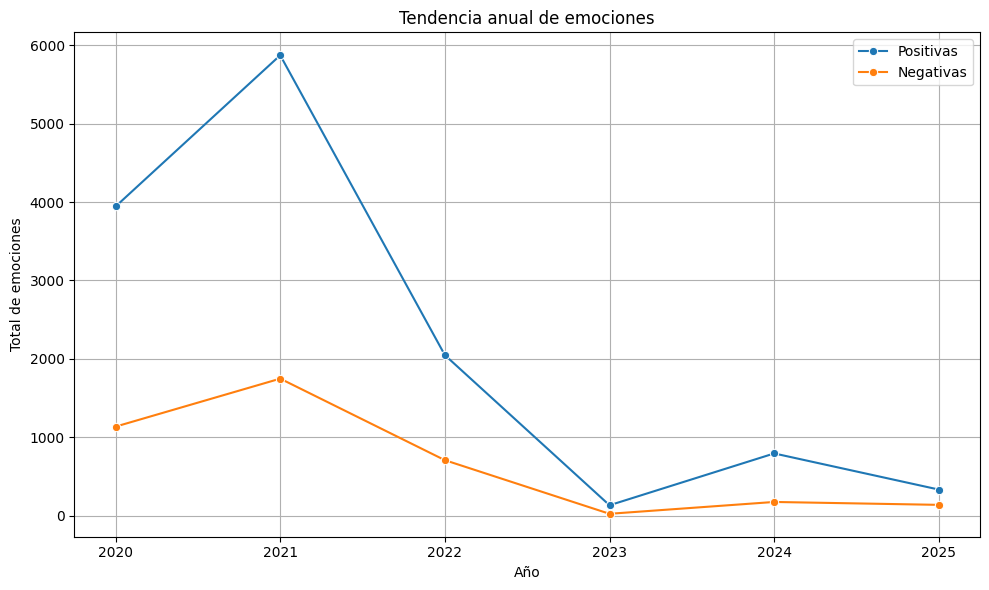

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_TablaAnalisis['fecha'] = pd.to_datetime(df_TablaAnalisis['fecha'], errors='coerce')
df_TablaAnalisis['anio'] = df_TablaAnalisis['fecha'].dt.year

emociones_anio = df_TablaAnalisis.groupby('anio').agg({
    'feliz': 'sum',
    'interesado': 'sum',
    'motivado': 'sum',
    'entusiasmado': 'sum',
    'preocupado': 'sum',
    'temeroso': 'sum',
    'triste': 'sum',
    'cansado': 'sum'
}).reset_index()

emociones_anio['positivas'] = emociones_anio[['feliz', 'interesado', 'motivado', 'entusiasmado']].sum(axis=1)
emociones_anio['negativas'] = emociones_anio[['preocupado', 'temeroso', 'triste', 'cansado']].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=emociones_anio, x='anio', y='positivas', label='Positivas', marker='o')
sns.lineplot(data=emociones_anio, x='anio', y='negativas', label='Negativas', marker='o')
plt.title('Tendencia anual de emociones')
plt.xlabel('Año')
plt.ylabel('Total de emociones')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 2️⃣ Promedio de emociones por docente
Promedio de cada emoción por docente, para entender su estilo de enseñanza.

In [13]:
emociones_docente = df_TablaAnalisis.groupby('nombre_docente').agg({
    'feliz': 'mean',
    'interesado': 'mean',
    'motivado': 'mean',
    'entusiasmado': 'mean',
    'preocupado': 'mean',
    'temeroso': 'mean',
    'triste': 'mean',
    'cansado': 'mean'
}).reset_index()

emociones_docente.head(10)


,nombre_docente,feliz,interesado,motivado,entusiasmado,preocupado,temeroso,triste,cansado
0,Alexandra zun‘iga ojeda,0.125000,0.250000,0.500000,0.250000,0.125000,0.041667,0.000000,0.083333
1,Alfredo jose paredes burneo,0.159664,0.277311,0.310924,0.075630,0.142857,0.008403,0.033613,0.168067
2,Alicia mercedes arciniegas naula,0.245283,0.433962,0.320755,0.075472,0.018868,0.037736,0.018868,0.000000
3,Ana alexandra santos delgado,0.118644,0.372881,0.423729,0.067797,0.067797,0.000000,0.000000,0.016949
4,Ana dolores verdu delgado,0.280876,0.237052,0.270916,0.127490,0.059761,0.013944,0.019920,0.079681
5,Ana lucia quin‘onez beltran,0.140000,0.360000,0.260000,0.040000,0.120000,0.020000,0.060000,0.320000
6,Ana maria beltran flandoli,0.412698,0.500000,0.444444,0.293651,0.126984,0.023810,0.031746,0.174603
7,Angela del cisne salazar romero,0.307317,0.258537,0.229268,0.121951,0.082927,0.024390,0.043902,0.185366
8,Angelica noemi arrobo rodas,0.058824,0.235294,0.117647,0.088235,0.205882,0.000000,0.029412,0.323529
9,Carlos byron bermeo leon,0.191667,0.425000,0.241667,0.108333,0.091667,0.008333,0.025000,0.075000


### 3️⃣ Top 10 docentes con más clases registradas
Se consideran QR únicos por docente. Este gráfico ayuda a entender quién usó más el sistema.


/var/folders/km/1771f0nj2f9fwy4p84204mbw0000gn/T/ipykernel_24608/1154528014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_docentes, y='nombre_docente', x='clases_unicas', palette='viridis')


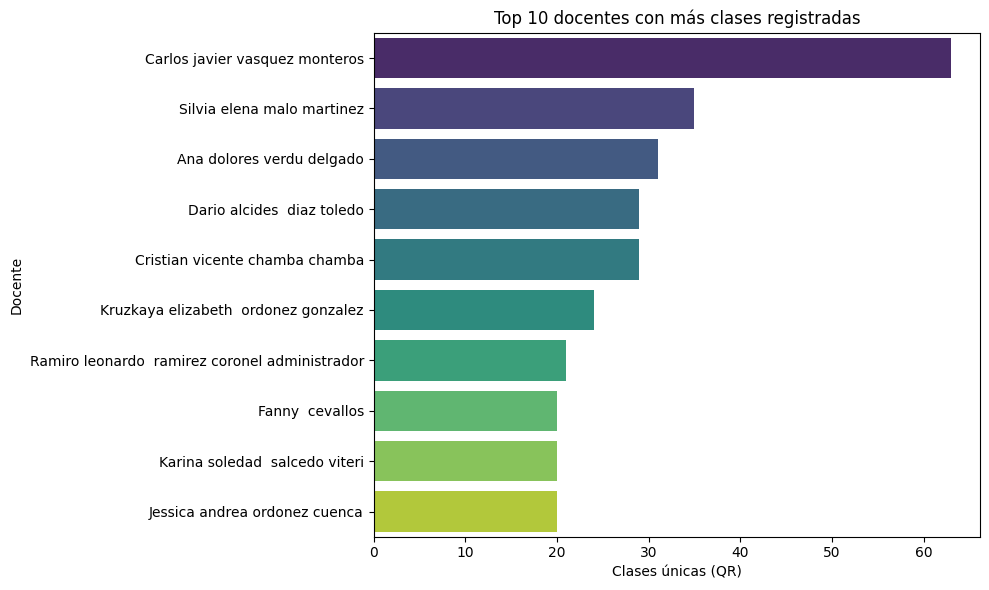

In [14]:
top_docentes = df_TablaAnalisis.groupby('nombre_docente')['qr_code'].nunique().reset_index(name='clases_unicas')
top_docentes = top_docentes.sort_values(by='clases_unicas', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_docentes, y='nombre_docente', x='clases_unicas', palette='viridis')
plt.title('Top 10 docentes con más clases registradas')
plt.xlabel('Clases únicas (QR)')
plt.ylabel('Docente')
plt.tight_layout()
plt.show()


### 4️⃣ Promedio de emociones por asignatura
Se analiza cuál asignatura genera más participación emocional en promedio.


In [15]:
prom_emociones = df_TablaAnalisis.groupby('nombre_asignatura').agg({
    'feliz': 'mean',
    'interesado': 'mean',
    'motivado': 'mean',
    'entusiasmado': 'mean',
    'preocupado': 'mean',
    'temeroso': 'mean',
    'triste': 'mean',
    'cansado': 'mean'
}).reset_index()

prom_emociones.sort_values(by='feliz', ascending=False).head(10)


,nombre_asignatura,feliz,interesado,motivado,entusiasmado,preocupado,temeroso,triste,cansado
137,Second language acquisition oct21-feb22,0.750000,0.500000,0.500000,0.500000,0.000000,0.250000,0.250000,0.250000
116,Practicum 2 jpaoct21-feb22,0.533898,0.245763,0.288136,0.228814,0.008475,0.008475,0.016949,0.025424
31,Dibujo anatomico oct20-feb21,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
64,Finanzas personales y empresariales oct21-feb22,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
130,Procesos psicologicos basicos i,0.500000,0.166667,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000
78,Gestion productiva 3.1,0.476190,0.285714,0.238095,0.190476,0.047619,0.000000,0.000000,0.095238
45,Educomunicacion ects oct20-feb21,0.460000,0.550000,0.480000,0.330000,0.120000,0.020000,0.030000,0.200000
101,Methodology for teaching english for specific ...,0.454545,0.471591,0.392045,0.295455,0.051136,0.000000,0.005682,0.056818
102,Metodologia de investigacion,0.447368,0.342105,0.210526,0.052632,0.000000,0.000000,0.000000,0.000000
30,Desarrollo web tec abr-ago 23,0.428571,0.476190,0.333333,0.142857,0.000000,0.000000,0.047619,0.190476


### 5️⃣ Materias con más emociones positivas
Se suman emociones positivas por materia para ver cuál motiva más.


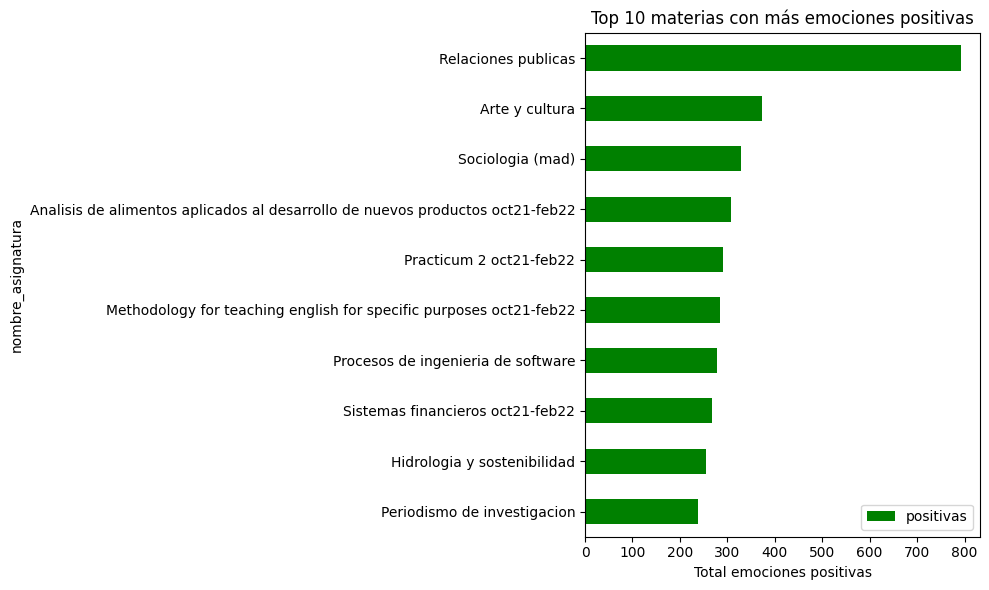

In [16]:
emociones_materia = df_TablaAnalisis.groupby('nombre_asignatura')[['feliz', 'interesado', 'motivado', 'entusiasmado']].sum()
emociones_materia['positivas'] = emociones_materia.sum(axis=1)
emociones_materia = emociones_materia.sort_values(by='positivas', ascending=False).head(10)

emociones_materia[['positivas']].plot(kind='barh', figsize=(10, 6), color='green')
plt.title('Top 10 materias con más emociones positivas')
plt.xlabel('Total emociones positivas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 6️⃣ Clases sin calificaciones emocionales
Se identifican sesiones donde no se registró ninguna emoción.


In [17]:
sin_emociones = df_TablaAnalisis[
    (df_TablaAnalisis[['feliz', 'interesado', 'motivado', 'entusiasmado',
                       'preocupado', 'temeroso', 'triste', 'cansado']].sum(axis=1) == 0)
]

sin_emociones[['qr_code', 'nombre_docente', 'nombre_asignatura', 'fecha']].head(10)


,qr_code,nombre_docente,nombre_asignatura,fecha
3,387249,Fredy rolando alvarado gonzalez,Los procesos penales y recursos,2025-01-28 20:54:26
78,387512,Fredy rolando alvarado gonzalez,Los procesos penales y recursos,2025-01-21 20:03:12
159,386177,Pablo jose castillo alvarez,La prueba y su valoracion,2025-01-20 20:56:50
183,387494,Fredy rolando alvarado gonzalez,Los procesos penales y recursos,2025-01-16 21:30:46
191,387494,Fredy rolando alvarado gonzalez,Los procesos penales y recursos,2025-01-16 21:30:46
198,387494,Fredy rolando alvarado gonzalez,Los procesos penales y recursos,2025-01-16 21:30:46
204,387494,Fredy rolando alvarado gonzalez,Los procesos penales y recursos,2025-01-16 21:30:46
222,390927,Jorge alonso benitez hurtado,Metodologia de la investigacion juridica,2025-01-15 20:29:26
227,390927,Jorge alonso benitez hurtado,Metodologia de la investigacion juridica,2025-01-15 20:29:26
235,390927,Jorge alonso benitez hurtado,Metodologia de la investigacion juridica,2025-01-15 20:29:26


### 7️⃣ Estudiantes únicos (QR codes) por año
Cada QR representa una sesión o estudiante diferente.


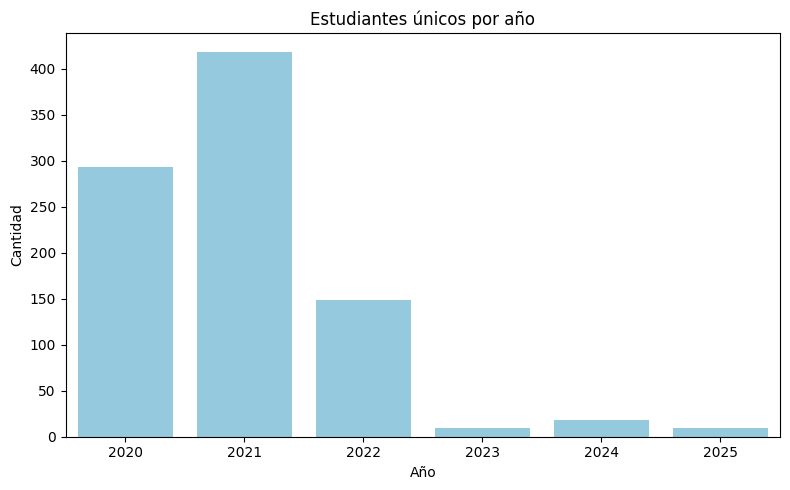

In [18]:
df_TablaAnalisis['anio'] = df_TablaAnalisis['fecha'].dt.year
estudiantes_anio = df_TablaAnalisis.groupby('anio')['qr_code'].nunique().reset_index(name='estudiantes_unicos')

plt.figure(figsize=(8, 5))
sns.barplot(data=estudiantes_anio, x='anio', y='estudiantes_unicos', color='skyblue')
plt.title('Estudiantes únicos por año')
plt.ylabel('Cantidad')
plt.xlabel('Año')
plt.tight_layout()
plt.show()


### 8️⃣ Sesiones más emotivas (positivo)
¿Cuáles sesiones tuvieron más participación positiva?


In [19]:
df_TablaAnalisis['emociones_positivas'] = df_TablaAnalisis[['feliz', 'interesado', 'motivado', 'entusiasmado']].sum(axis=1)

top_sesiones = df_TablaAnalisis.sort_values(by='emociones_positivas', ascending=False)[
    ['qr_code', 'nombre_docente', 'nombre_asignatura', 'fecha', 'emociones_positivas']
].head(10)

top_sesiones


,qr_code,nombre_docente,nombre_asignatura,fecha,emociones_positivas
3649,205442,Eulalia elizabeth salas tenesaca,Sistemas financieros oct21-feb22,2021-12-20 16:28:53,4
12901,35283,Kruzkaya elizabeth ordonez gonzalez,Periodismo de investigacion,2020-05-07 11:53:16,4
2107,235665,Jorge geovanny figueroa hurtado,Analisis de alimentos aplicados al desarrollo ...,2022-01-24 16:37:41,4
12875,47971,Paola salome andrade abarca,Administracion estrategica,2020-05-07 16:10:54,4
4690,317362,Tatiana cecibel mansanillas rojas,Entrevista psicologica tmoct21-feb22,2021-12-07 19:19:03,4
8109,129484,Silvia elena malo martinez,Arte y cultura,2021-05-21 08:45:44,4
2141,319862,Luis eduardo velez ajila,Practicum 3.1 lvoct21-feb22,2022-01-24 08:48:23,4
4672,310581,Cesar augusto ochoa cueva,Methodology for teaching english for specific ...,2021-12-07 22:10:00,4
10799,17213,Karen cesibel valdiviezo abad,Relaciones publicas,2020-06-30 18:46:07,4
4671,310581,Cesar augusto ochoa cueva,Methodology for teaching english for specific ...,2021-12-07 22:10:00,4


### 🔟 Top materias con más registros totales (calificaciones)
Muestra qué materias fueron más evaluadas durante todo el periodo.


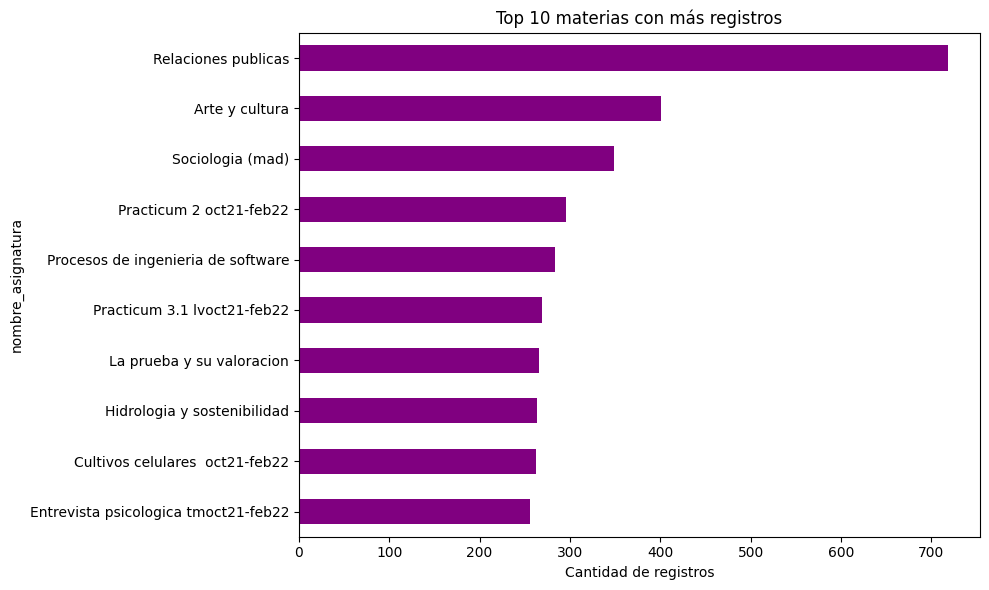

In [21]:
top_materias = df_TablaAnalisis['nombre_asignatura'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_materias.plot(kind='barh', color='purple')
plt.title('Top 10 materias con más registros')
plt.xlabel('Cantidad de registros')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 😊 Promedio de emociones positivas por asignatura
Visualiza las materias que en promedio generan mayor nivel de emociones positivas.


/var/folders/km/1771f0nj2f9fwy4p84204mbw0000gn/T/ipykernel_24608/2795213737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios, x='promedio_positivo', y='nombre_asignatura', palette='coolwarm')


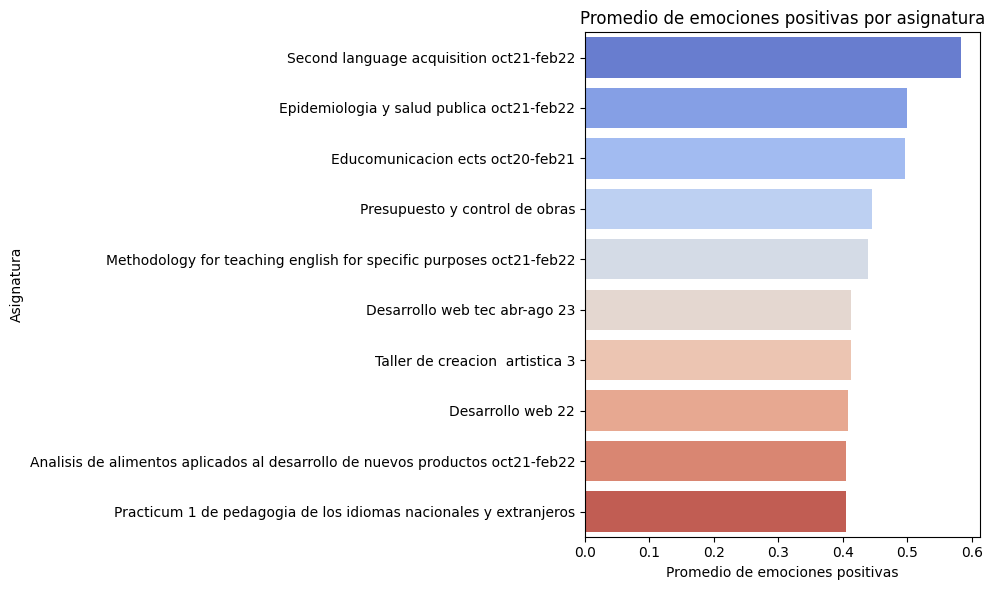

In [23]:
promedios = df_TablaAnalisis.groupby('nombre_asignatura').agg({
    'feliz': 'mean',
    'interesado': 'mean',
    'motivado': 'mean'
}).mean(axis=1).reset_index(name='promedio_positivo')

promedios = promedios.sort_values(by='promedio_positivo', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=promedios, x='promedio_positivo', y='nombre_asignatura', palette='coolwarm')
plt.title("Promedio de emociones positivas por asignatura")
plt.xlabel("Promedio de emociones positivas")
plt.ylabel("Asignatura")
plt.tight_layout()
plt.show()


### 📈 Promedio general de emociones en todo el periodo
Resumen promedio de cada emoción en los registros totales, permite identificar las más frecuentes.


/var/folders/km/1771f0nj2f9fwy4p84204mbw0000gn/T/ipykernel_24608/262110518.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios_emociones, x='promedio', y='emocion', palette='Set2')


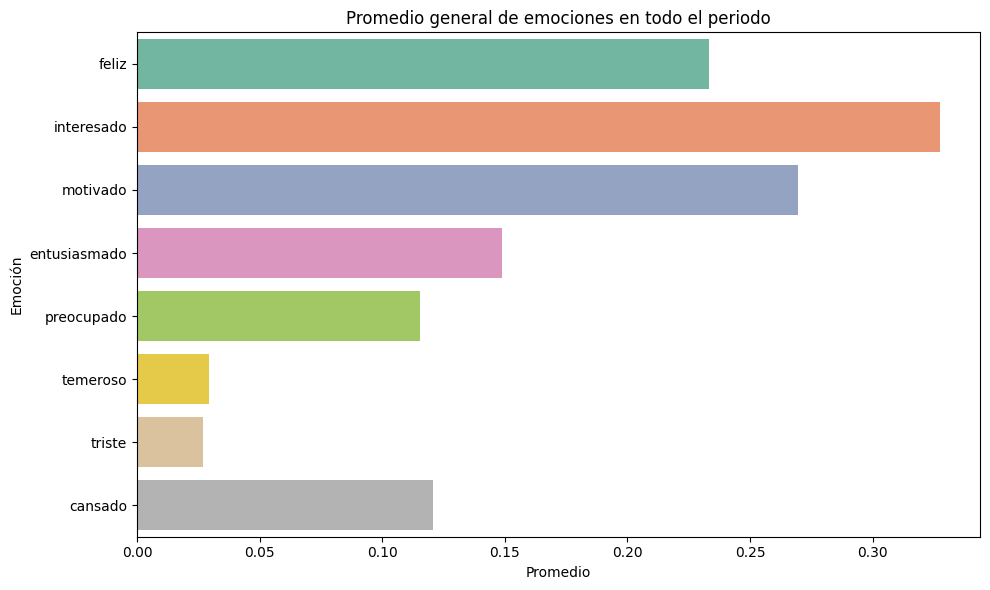

In [25]:
emociones = ['feliz', 'interesado', 'motivado', 'entusiasmado',
             'preocupado', 'temeroso', 'triste', 'cansado']
promedios_emociones = df_TablaAnalisis[emociones].mean().reset_index()
promedios_emociones.columns = ['emocion', 'promedio']

plt.figure(figsize=(10, 6))
sns.barplot(data=promedios_emociones, x='promedio', y='emocion', palette='Set2')
plt.title("Promedio general de emociones en todo el periodo")
plt.xlabel("Promedio")
plt.ylabel("Emoción")
plt.tight_layout()
plt.show()
